In [114]:
# Answer with the type of stats test you would use (assume normal distribution):



# Is there a relationship between the length of your arm and the length of your foot?

# for normal distributions: stats.pearsonr



# Do guys and gals quit their jobs at the same rate?

# for nonparametic test: `stats.spearmanr`



# Does the length of time of the lecture correlate with a students grade?
# for normal distributions: stats.pearsonr

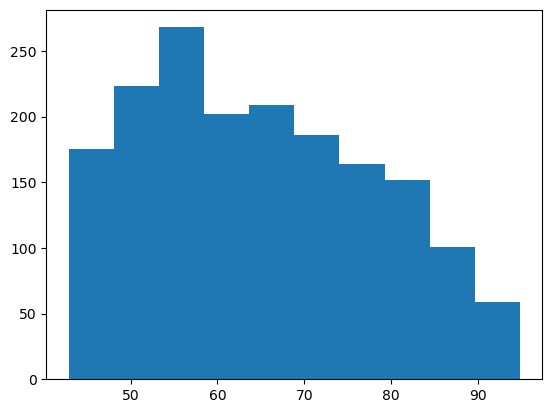

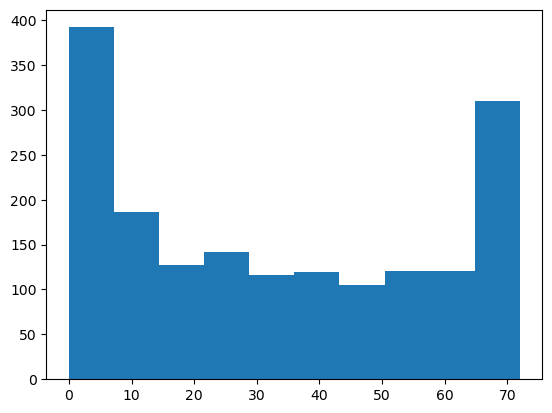

0.6644708508462759 5.423601644635052e-222


In [246]:
# Use the telco_churn data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env

query = '''

select * from customers;


'''
# Does tenure correlate with monthly charges?

# x = db.tenure
# y = db.monthly_charges


# Hypothesis Testing Procedure:¶


# Determine the appropriate test
# continuous data
# r, p = stats.pearsonr(x, y)

# what variables you are comparing
# monthly charges and tenure

# are your variables continuous or categorical?
# continuous


# Setup

# set null hypothesis
# monthly charges have no effect on tenure


# set alternate hypothesis
#monthly charges have do have an effect on tenure

# # set p-values
# alpha = .05

# # Visualize
# plt.scatter(x, y)
# plt.xlabel('tenure')
# plt.ylabel('monthly_charges')
# plt.show()

# # Calculate test statistic + p-value
# r, p = stats.pearsonr(x, y)
# # Conclude

# url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/telco_churn'
# db = pd.read_sql(query, url)

# print(r, p)
# low positive correlation
# there is significant correlation because the p value is less than alpha








# Total charges?

# Hypothesis Testing Procedure:
# total charges have no effect on tenure
# total charges have an effect on tenure



# Determine the appropriate test
# continuous data
# r, p = stats.pearsonr(x, y)


# what variables you are comparing?
# total charges and tenure


# are your variables continuous or categorical?
# continuous


# Setup

x = db.tenure.fillna(0)
y = pd.to_numeric(db.total_charges, errors='coerce').fillna(0)





# set null hypothesis
# total charges have no effect on tenure


# set alternate hypothesis
# total charges have an effect on tenure



# set p-values
alpha = .05


# Visualize
# plt.hist(x)

# plt.show()



# Calculate test statistic + p-value
# r, p = stats.pearsonr(x, y)
# print(r, p)

# r, p = stats.spearmanr(x, y)
# print(r, p)

# Conclude
# we fail to reject the null hypothesis


# What happens if you control for phone and internet service?
new_database = db[db.phone_service == 'Yes']
new_database = new_database[new_database.internet_service_type_id == 1]
new_database



# Hypothesis Testing Procedure:¶
# Determine the appropriate test


x = new_database.tenure
y = new_database.monthly_charges


# what variables you are comparing?
# monthly_charges
# tenure



# are your variables continuous or categorical?
# continuous


# Setup



# set null hypothesis
# among customers that have phone and internet service there is no correlation between tenure
# and monthly charges


# set alternate hypothesis
# among customers that have phone and internet service there is a correlation between tenure
# and monthly charges


# set p-values
alpha = .05


# Visualize
plt.hist(y)

plt.show()

plt.hist(x)

plt.show()
# Calculate test statistic + p-value

other_r , other_p = stats.spearmanr(x, y)



print(other_r, other_p)


# Conclude



In [260]:
# Use the employees database.

query = '''
select emp_no ,datediff(maximum_date, hire_date) as days from employees
join (select emp_no, max(to_date) as maximum_date from salaries 
group by emp_no)  as left_company using(emp_no)
where maximum_date < curdate();
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
employee_days_one = pd.read_sql(query, url)



query = '''
select emp_no, datediff(curdate(),  hire_date) as days from employees
join (select emp_no, max(to_date) as maximum_date from salaries 
group by emp_no) as subtable using( emp_no)
where maximum_date > curdate();
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
employee_days_two = pd.read_sql(query, url)


query = '''
select  emp_no, max(salary), max(to_date) from salaries
group by emp_no;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
employee_day_salaries = pd.read_sql(query, url)



(59900, 2)
(240124, 2)
        emp_no  max(salary) max(to_date)
0        10001        88958   9999-01-01
1        10002        72527   9999-01-01
2        10003        43699   9999-01-01
3        10004        74057   9999-01-01
4        10005        94692   9999-01-01
...        ...          ...          ...
300019  499995        52868   9999-01-01
300020  499996        69501   9999-01-01
300021  499997        83441   9999-01-01
300022  499998        55003   9999-01-01
300023  499999        77303   9999-01-01

[300024 rows x 3 columns]
        emp_no   days  max(salary)
0        10001  13438        88958
1        10002  13655        72527
2        10003  13375        43699
3        10004  13280        74057
4        10005  12264        94692
...        ...    ...          ...
300019  499995  11046        52868
300020  499996  11884        69501
300021  499997  13504        83441
300022  499998  10772        55003
300023  499999   9263        77303

[300024 rows x 3 columns]


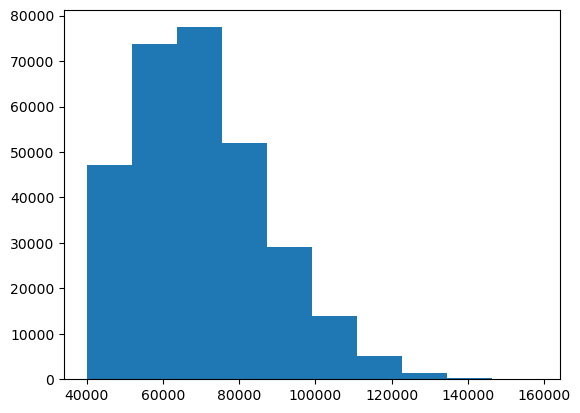

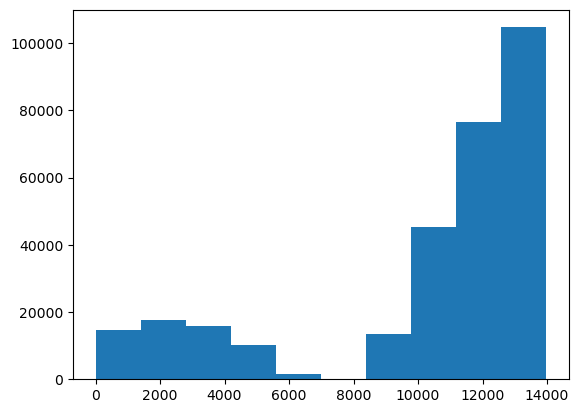

0.3756747592045724 0.0


In [292]:
employee_days_one.sort_values(by='emp_no')

print(employee_days_one.shape)
print(employee_days_two.shape)
print(employee_day_salaries.sort_values(by='emp_no'))


# Is there a relationship between how long an employee has been with the company and their salary?


# print(employee_days_one)
df = pd.concat([employee_days_one, employee_days_two], axis = 0)
df = df.sort_values(by='emp_no')
df = pd.merge(df, employee_day_salaries, how='inner', on = 'emp_no')
df = df.drop(columns='max(to_date)')


print(df)

# Hypothesis Testing Procedure:
# Determine the appropriate test

x = df.days
y = df['max(salary)']


# what variables you are comparing?
# the tenure and the max salary of employees


# are your variables continuous or categorical?
# both are continuous 



# Setup
# set null hypothesis
# there is no correlation between tenure and salary

# set alternate hypothesis
# there is correlation between tenure and salary


# set p-values
alpha = .05


# Visualize
plt.hist(y)

plt.show()

plt.hist(x)

plt.show()
# Calculate test statistic + p-value
r,p = stats.spearmanr(x,y)

print(r,p)


# Conclude
# there is low positive correlation






In [ ]:
# the extra work with the wrong set of data


# telco_churn = pd.read_csv('telco_norm.csv')


# # Does tenure correlate with monthly charges?


# telco_churn['tenure'] = (pd.to_datetime(telco_churn['churn_month']) - pd.to_datetime(telco_churn['signup_date']))

# telco_churn['tenure'] = telco_churn['tenure'].astype(str)

# telco_churn['tenure'] = telco_churn['tenure'].str.split('days').str[0]



    
# print(telco_churn.tenure != 'NaT')
# telco_churn['tenure'] = telco_churn[telco_churn.tenure != 'NaT']
# telco_churn['tenure'] = pd.to_numeric(telco_churn['tenure'], errors='coerce')

# the_second_set_of_data = telco_churn['tenure']




# print(the_first_set_of_data)

# print(the_second_set_of_data)

# alpha = .05
# # r, p = stats.pearsonr(the_first_set_of_data, the_second_set_of_data)
# # r, p


In [298]:

# Is there a relationship between how long an employee has been with the company and the number
# of titles they have had?

query = '''
select emp_no, datediff(maximum_to_date, min_from_date) as days from (
select emp_no, min(from_date) as min_from_date, max(to_date) as maximum_to_date from titles
group by emp_no
having maximum_to_date < curdate() )as quitters
;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
tenure_employees_not_current = pd.read_sql(query, url)



query = '''
select emp_no, datediff(curdate(), min_from_date) as days from(
select emp_no, min(from_date) as min_from_date, max(to_date) as maximum_to_date from titles
group by emp_no
having maximum_to_date > curdate()) as current_emp
;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
tenure_employees_current = pd.read_sql(query, url)




query = '''
select emp_no, count(title) from titles
group by emp_no;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
count_of_titles = pd.read_sql(query, url)









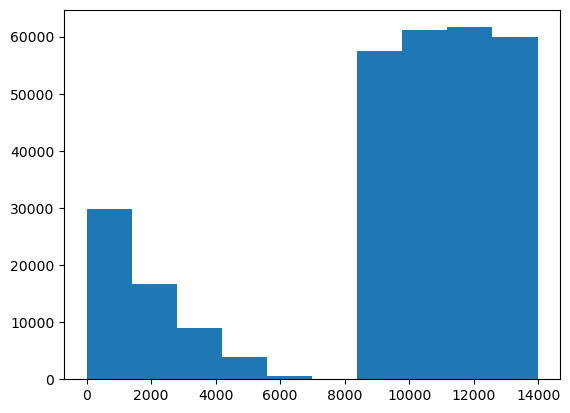

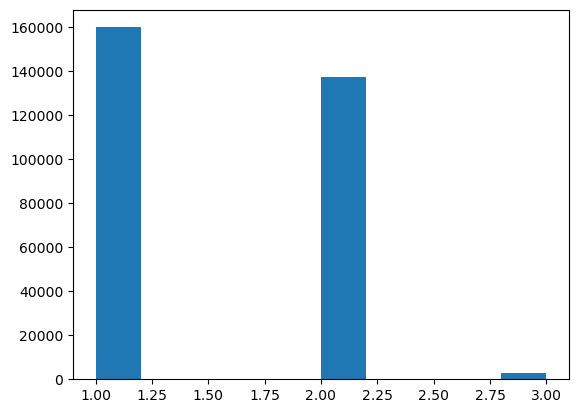

0.5457169312525748 0.0


In [308]:
# print(tenure_employees_not_current)
# print(tenure_employees_current)
# print(count_of_titles)


# Is there a relationship between how long an employee has been with the company and the number
# of titles they have had?


df = pd.concat([tenure_employees_not_current, tenure_employees_current], axis = 0)

df = df.sort_values(by='emp_no')

df = pd.merge(df, count_of_titles, how='inner', on = 'emp_no')

df

# Hypothesis Testing Procedure:¶
# Determine the appropriate test


# what variables you are comparing?


# are your variables continuous or categorical?
# one is catagorical one is continuous

# Setup
# set null hypothesis
# there is no correlation between the count of titles and the tenure


# set alternate hypothesis
# there is a correlation between the count of titles and the tenure

# set p-values
alpha = .05
# Visualize
x = df['count(title)']
y = df.days
plt.hist(y)

plt.show()

plt.hist(x)

plt.show()

# Calculate test statistic + p-value
r, p = stats.spearmanr(x,y)
print(r,p)

# Conclude
# there is moderate positive correlation 
# we reject the null hypothesis

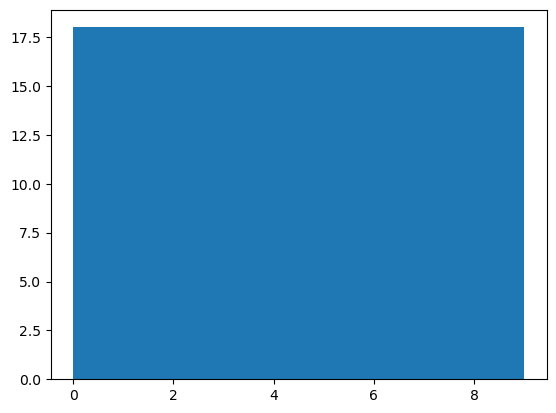

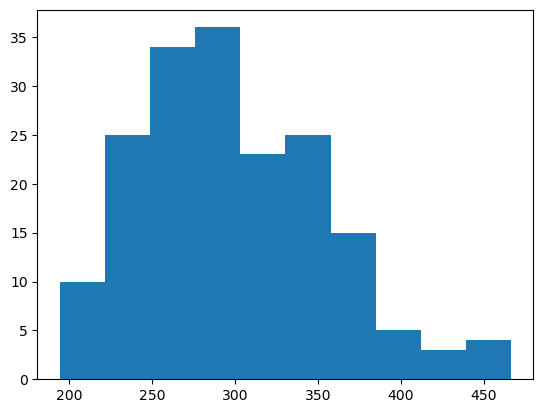

0.5352302262650255 9.89409632221439e-15
0.5228138502259547 5.132878057706873e-14


In [313]:
# Use the sleepstudy data.
from pydataset import data
df = data('sleepstudy')
df
# Is there a relationship between days and reaction time?

# Determine the appropriate test
# what variables you are comparing?
# days to reaction time


# are your variables continuous or categorical?
# one is catagorical one is continuous


# Setup
# set null hypothesis
# there is no correlation between days and reaction time


# set alternate hypothesis
# there is a correlation between days and reaction time



# set p-values

alpha = .05
# Visualize

x = df.Days
y = df.Reaction

plt.hist(x)
plt.show()
plt.hist(y)
plt.show()
# Calculate test statistic + p-value
r, p = stats.pearsonr(x,y)
print(r,p)

r, p = stats.spearmanr(x,y)
print(r,p)
# Conclude
# there is moderate positive correlation
# we reject the null hypothesis

In [ ]:
# Answer with the type of stats test you would use (assume normal distribution):

# Do students get better test grades if they have a rubber duck on their desk?


# Does smoking affect when or not someone has lung cancer?


# Is gender independent of a person’s blood type?


# A farming company wants to know if a new fertilizer has improved crop yield or not


# Does the length of time of the lecture correlate with a students grade?


# Do people with dogs live in apartments more than people with cats?